In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg 


In [2]:
#pip install tensorflow

In [3]:
## INPUT PATH DEFINE 
X_train=r'E:\Machine Learning Projects\Natural_Image\Test'
X_test=r'E:\Machine Learning Projects\Natural_Image\Train'


In [5]:
# re-size all the images to this  VGG16 works on 224,224 size
IMAGE_SIZE = [224, 224]

In [7]:
from tensorflow.keras.applications import InceptionV3


In [9]:
# add preprocessing layer to the front of VGG
# include_top=False means last layer is getting removed 
## this code is alreadu given in Keras 
## weights='imagenet' for reuseing the weights

## vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
## vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
## rest = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
## inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

rest = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [11]:
# don't train existing weights
for layer in rest.layers:         ## for layer in rest.layers // for layer in inception.layers // for layer in vgg.layers
    layer.trainable = False     ## IF we keep true then model will train again and again 

In [13]:
# useful for getting number of classes
import glob

# Get list of folders
folders = glob.glob(r'E:\Machine Learning Projects\Natural_Image/Test/*')


In [15]:
# Print folders
for folder in folders:
    print(folder)


E:\Machine Learning Projects\Natural_Image/Test\cars
E:\Machine Learning Projects\Natural_Image/Test\Trains


In [17]:
#folders2 = glob.glob(r'E:\Machine Learning Projects\Natural_Image/Train/*')


In [19]:
#for folder in folders2:
    #print(folder)

In [17]:
# our layers - you can add more if you want // dense(512) // activation='relu'
x = Flatten()(rest.output)       ## x = Flatten()(rest.output) // x = Flatten()(inception.output) //x = Flatten()(vgg.output)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x) ## we have 2 features normal and phenoma /instead of 2 we can provide (len(folders))
## x = Dropout(0.5)(prediction)

In [19]:
prediction

<KerasTensor shape=(None, 2), dtype=float32, sparse=False, name=keras_tensor_312>

In [21]:
# create a model object
from tensorflow.keras.models import Model

model = Model(inputs=rest.input, outputs=prediction)  

## model = Model(inputs=vgg.input, outputs=prediction) 
## model = Model(inputs=rest.input, outputs=prediction)
## model = Model(inputs=inception.input, outputs=prediction)

In [27]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 21,870,754 (83.43 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [23]:
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'E:\Machine Learning Projects\Natural_Image\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'E:\Machine Learning Projects\Natural_Image\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [27]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 0.3333 - loss: 1.4010 - val_accuracy: 0.8333 - val_loss: 2.1943
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8333 - loss: 1.4664 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 5.8104e-05 - val_accuracy: 1.0000 - val_loss: 1.9868e-08


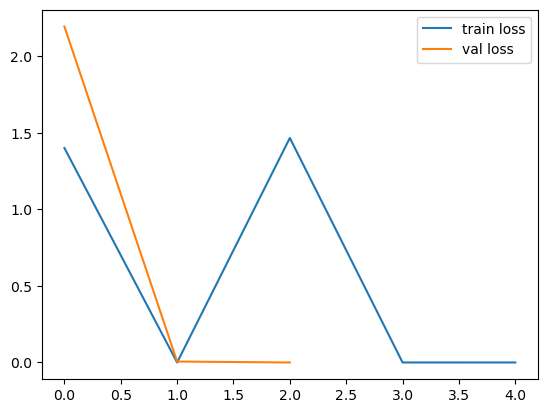

<Figure size 640x480 with 0 Axes>

In [29]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

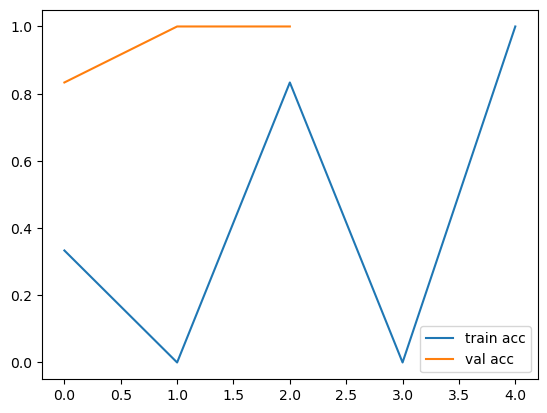

<Figure size 640x480 with 0 Axes>

In [31]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 93s 0us/step
Classifying Car Images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\cars\1690351879485.jfif:
1. sports_car: 0.4079
2. convertible: 0.3534
3. racer: 0.2039


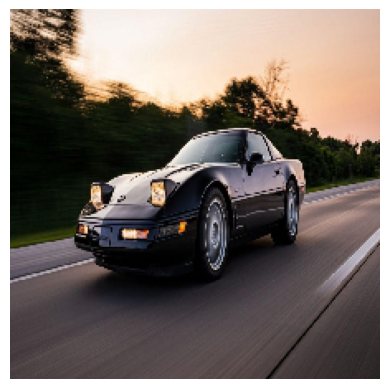

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\cars\1957-Chevy-Bel-Air-Red.webp:
1. pickup: 0.2375
2. fire_engine: 0.2014
3. cab: 0.1805


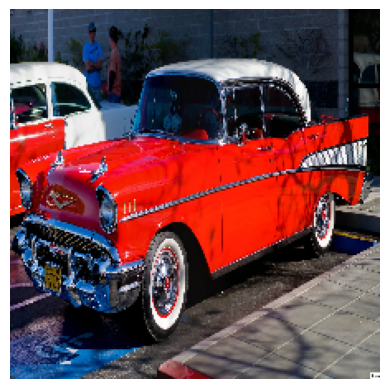

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\cars\1987-buick-grand-national-gnx-003-front-3-4-1510332838.jpg:
1. pickup: 0.6029
2. jeep: 0.0978
3. tow_truck: 0.0540


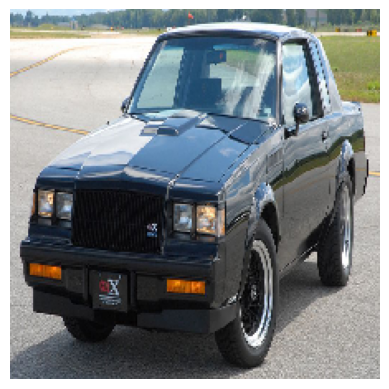

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\cars\Contessah.jpg.webp:
1. jeep: 0.5787
2. golfcart: 0.1317
3. pickup: 0.0320


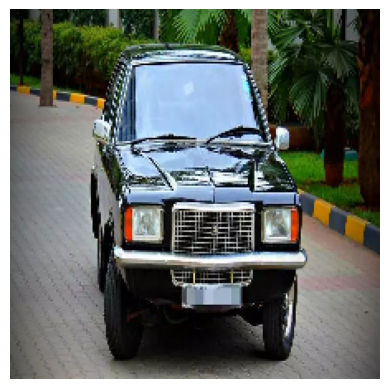

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\cars\download.jfif:
1. amphibian: 0.2681
2. convertible: 0.2299
3. beach_wagon: 0.2151


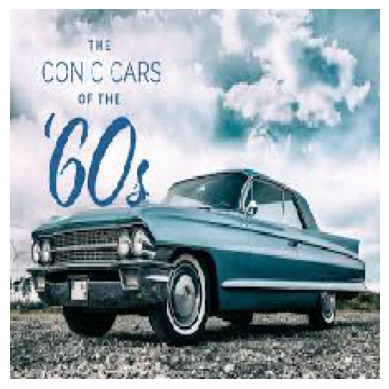

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\cars\images (1).jfif:
1. tow_truck: 0.4483
2. pickup: 0.1815
3. snowplow: 0.0561


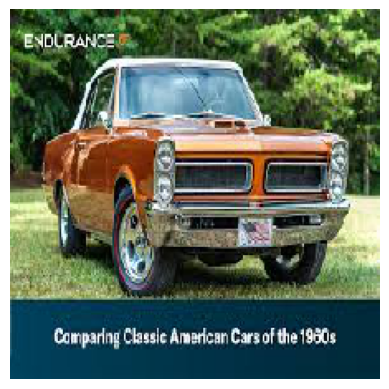

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\cars\images.jfif:
1. grille: 0.7190
2. pickup: 0.1094
3. convertible: 0.0536


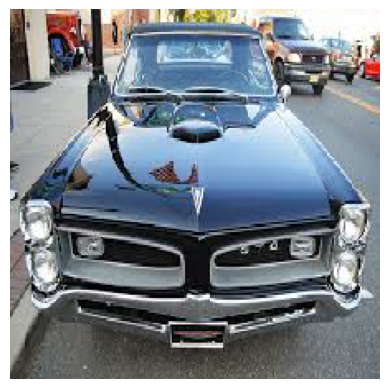

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\cars\istockphoto-1270426808-612x612.jpg:
1. convertible: 0.5560
2. sports_car: 0.2340
3. grille: 0.1309


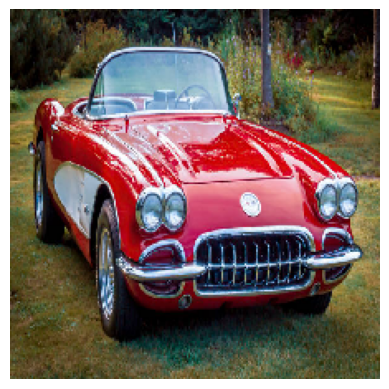

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\cars\one-of-many-american-1950s-cars-cherished-in-the-cuban-capital-havana-AAY2BD.jpg:
1. convertible: 0.6464
2. beach_wagon: 0.1997
3. cab: 0.0447


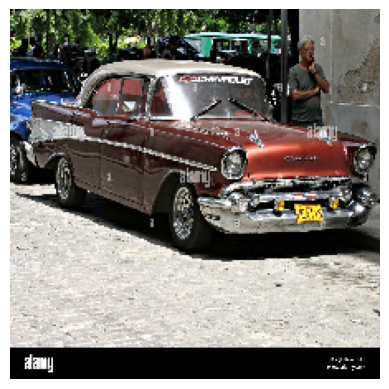

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\cars\pontiac-gto-automobile-models-photo-u5.jfif:
1. convertible: 0.6718
2. beach_wagon: 0.2956
3. grille: 0.0157


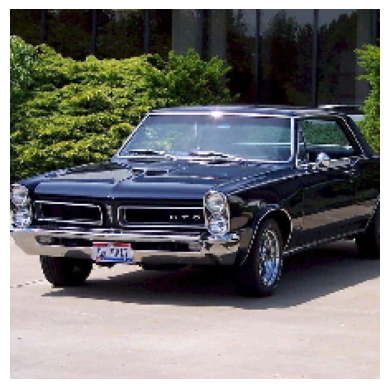


Classifying Train Images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\trains\20130607.jpg:
1. passenger_car: 0.8555
2. steam_locomotive: 0.0949
3. electric_locomotive: 0.0253


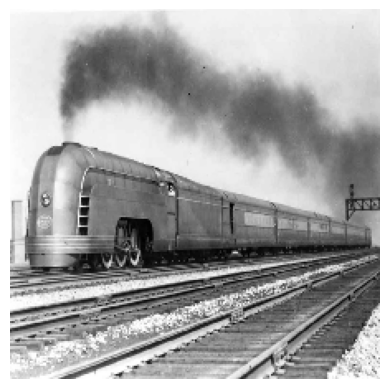

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\trains\ab67616d00001e02c1bf44bfbbb2234d2442329d.jfif:
1. steam_locomotive: 0.4328
2. electric_locomotive: 0.2400
3. harvester: 0.0714


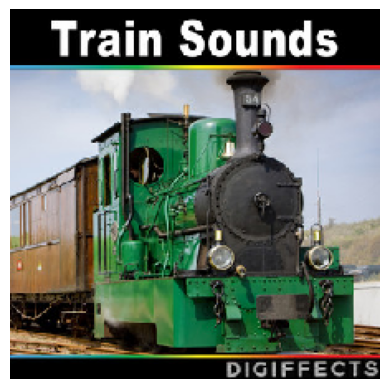

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\trains\GettyImages-542891619.webp:
1. streetcar: 0.8346
2. passenger_car: 0.1602
3. trolleybus: 0.0034


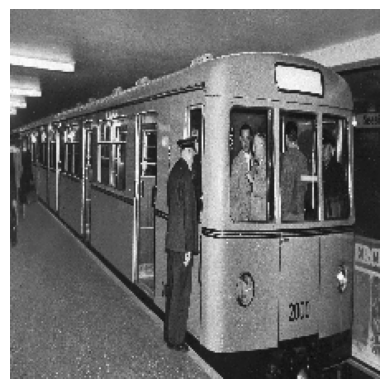

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\trains\images (2).jfif:
1. passenger_car: 0.6936
2. freight_car: 0.1855
3. electric_locomotive: 0.1046


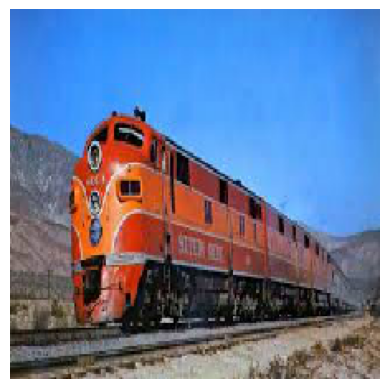

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\trains\images.jfif:
1. steam_locomotive: 0.9797
2. harvester: 0.0090
3. thresher: 0.0040


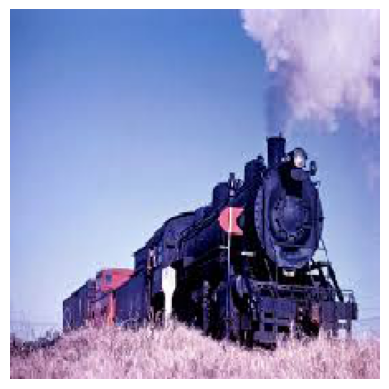

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\trains\only-three-of-these-trains.jpg:
1. electric_locomotive: 0.7215
2. passenger_car: 0.1939
3. bullet_train: 0.0463


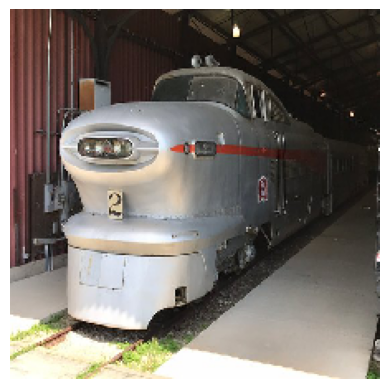

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\trains\probably-the-coolest-train-you-will-see-today-the-mercury-v0-j2bwr7n0rvhb1.webp:
1. passenger_car: 0.3857
2. electric_locomotive: 0.1952
3. steam_locomotive: 0.1919


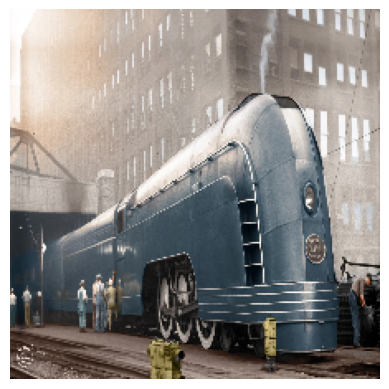

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for E:\\Machine Learning Projects\\Natural_Image\\Test\\trains\sddefault.jpg:
1. steam_locomotive: 0.9993
2. passenger_car: 0.0005
3. electric_locomotive: 0.0001


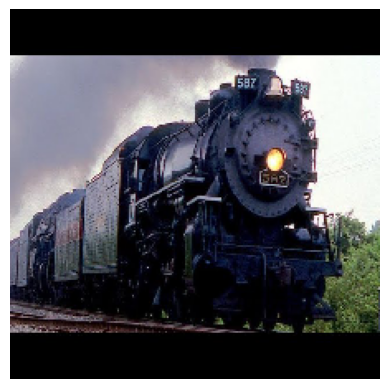

In [33]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the VGG16 model
model = VGG16(weights='imagenet')

# Function to load and preprocess the image
def load_and_prep_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Classify and display image with the prediction
def classify_and_display_image(img_path):
    img_array = load_and_prep_image(img_path)
    predictions = model.predict(img_array)
    predicted_classes = decode_predictions(predictions, top=3)[0]
    
    # Display the image
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    
    # Print the top predicted classes
    print(f"Predictions for {img_path}:")
    for i, (imagenet_id, label, score) in enumerate(predicted_classes):
        print(f"{i+1}. {label}: {score:.4f}")
    plt.show()

# Define the directories for cars and trains
cars_dir = r'E:\\Machine Learning Projects\\Natural_Image\\Test\\cars'  # Update with actual directory path
trains_dir = r'E:\\Machine Learning Projects\\Natural_Image\\Test\\trains'  # Update with actual directory path

# Display and classify all car images
print("Classifying Car Images:")
for img_name in os.listdir(cars_dir):
    img_path = os.path.join(cars_dir, img_name)
    classify_and_display_image(img_path)

# Display and classify all train images
print("\nClassifying Train Images:")
for img_name in os.listdir(trains_dir):
    img_path = os.path.join(trains_dir, img_name)
    classify_and_display_image(img_path)


To achieve object recognition, you can implement deep learning models such as Convolutional Neural Networks (CNNs) or use transfer learning with a pre-trained model like ResNet, VGG16, or EfficientNet.